<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/clustered_design_1_ga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymoo

This experiment is based on the following paper:  
_Solving structural engineering design optimization problems using an artificial bee colony algorithm_: https://www.aimsciences.org/article/doi/10.3934/jimo.2014.10.777

I will be using the Genetic Algo to solve the same problem as given in the paper.

In [ ]:
import numpy as np
from pymoo.model.problem import FunctionalProblem
from pymoo.algorithms.so_genetic_algorithm import GA

from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination
from pymoo.optimize import minimize
from sklearn.datasets import make_blobs

Problem 1:  
**Design of pressure vessel. (Section 4.2.1).**


---


Objective functions:  
```
Minimize f(X) = 0.6224*x1*x3*x4 + 1.7781*x2*x3^2+ 3.1661*x1^2*x4 + 19.84*x1^2*x3

Such that:
g1(X) = −x1 + 0.0193*x3 <= 0
g2(X) = −x2 + 0.00954*x3 <= 0
g3(X) = − pi*x3^2*x4 − 4/3 *pi*x3^3 + 1296000 <= 0
g4(X) = x4 − 240 <= 0

Bounds:
0.0625 <= x1, x2 <= 99*0.0625 
10 <= x3, x4 <= 200
```

> There are four design variable associated with it namely
as thickness of the pressure vessel, Ts = x1, thickness of the head, Th = x2, inner radius of the vessel, R = x3, and length of the vessel without heads, L = x4 i.e. the variables vectors are given (in inches) by X = (Ts, Th,R,L) = (x1, x2, x3, x4).

In [ ]:
import math
pi = math.pi

#objective functions
objs = [
    lambda x: 0.6224 * x[0]*x[2]*x[3] + 1.7781 * x[1]*x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84*x[0]**2 * x[2],
]

# Contraint equations
constr_ieq = [
    lambda x: - x[0] + 0.0193*x[2],
    lambda x: - x[1] + 0.00954*x[2],
    lambda x: - pi*x[2]**2*x[3] - 4/3 *pi*x[2]**3 + 1296000,
    lambda x: x[3] - 240
]

# value bounds
lower_bound = np.array([0.0625, 0.0625, 10, 10])
upper_bound = np.array([99*0.0625, 99*0.0625, 200, 200])

# initialising problem
problem = FunctionalProblem(4, objs, constr_ieq=constr_ieq, xl=lower_bound, xu=upper_bound)

Instead of starting out with a randomly generated population as we usually do, I will be generating clusters of populations, i.e. the population will be clustered into groups instead of being scattered throughout the solution space.

**Reason**: Comparison of algo/solution quality with that when population is randomly scattered.

In [ ]:
# Generating 30 clusters:
X, y = make_blobs(n_samples=300, centers=30, n_features=4, random_state=0)

Starting GA:

In [ ]:
algorithm = GA(
    pop_size=1000,
    sampling = X,
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True)

termination = get_termination("n_gen", 280)

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     fopt     |     favg    
    1 |     300 |  1.28801E+06 |  1.29600E+06 |            - |            -
    2 |    1300 |  4.94540E+05 |  1.27660E+06 |            - |            -


/usr/local/lib/python3.6/dist-packages/pymoo/operators/crossover/simulated_binary_crossover.py:45: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (self.eta + 1.0)))[mask]
/usr/local/lib/python3.6/dist-packages/pymoo/operators/mutation/polynomial_mutation.py:47: RuntimeWarning: invalid value encountered in power
  d = np.power(val, mut_pow) - 1.0
/usr/local/lib/python3.6/dist-packages/pymoo/operators/mutation/polynomial_mutation.py:52: RuntimeWarning: invalid value encountered in power
  d = 1.0 - (np.power(val, mut_pow))
/usr/local/lib/python3.6/dist-packages/pymoo/operators/mutation/polynomial_mutation.py:59: RuntimeWarning: invalid value encountered in less
  _Y[_Y < xl] = xl[_Y < xl]
/usr/local/lib/python3.6/dist-packages/pymoo/operators/mutation/polynomial_mutation.py:60: RuntimeWarning: invalid value encountered in greater
  _Y[_Y > xu] = xu[_Y > xu]
/usr/local/lib/python3.6/dist-packages/pymoo/operators/repair/to_bound.py:13: Ru

    3 |    2300 |  2.82250E+05 |  1.24511E+06 |            - |            -
    4 |    3300 |  1.235328423 |  1.16033E+06 |            - |            -
    5 |    4300 |  0.00000E+00 |  9.94084E+05 |  6.99277E+04 |  6.99277E+04
    6 |    5300 |  0.00000E+00 |  7.32086E+05 |  1.99885E+04 |  5.08802E+04
    7 |    6300 |  0.00000E+00 |  3.97089E+05 |  1.48105E+04 |  5.52664E+04
    8 |    7300 |  0.00000E+00 |  1.10706E+05 |  1.48105E+04 |  5.71128E+04
    9 |    8300 |  0.00000E+00 |  0.362639733 |  1.37262E+04 |  5.88892E+04
   10 |    9300 |  0.00000E+00 |  0.002754730 |  8.67128E+03 |  5.83352E+04
   11 |   10300 |  0.00000E+00 |  0.00000E+00 |  8.67128E+03 |  3.36035E+04
   12 |   11300 |  0.00000E+00 |  0.00000E+00 |  8.12381E+03 |  2.34643E+04
   13 |   12300 |  0.00000E+00 |  0.00000E+00 |  8.12381E+03 |  1.83978E+04
   14 |   13300 |  0.00000E+00 |  0.00000E+00 |  8.12381E+03 |  1.50428E+04
   15 |   14300 |  0.00000E+00 |  0.00000E+00 |  8.12381E+03 |  1.29098E+04
   16 |   15

In [ ]:
print("X: ", res.X)
print("Obj: ", res.F)
print("Constraints: ", res.G)
print("Execution time: ", res.exec_time)

X:  [ 1.11095781  0.54914579 57.56243133 47.75224693]
Obj:  [6732.13321949]
Constraints:  [0. 0. 0. 0.]
Execution time:  42.29894280433655


Covergence:



```
x-axis: number of function evaluations
y-axis: optimum objective value
```



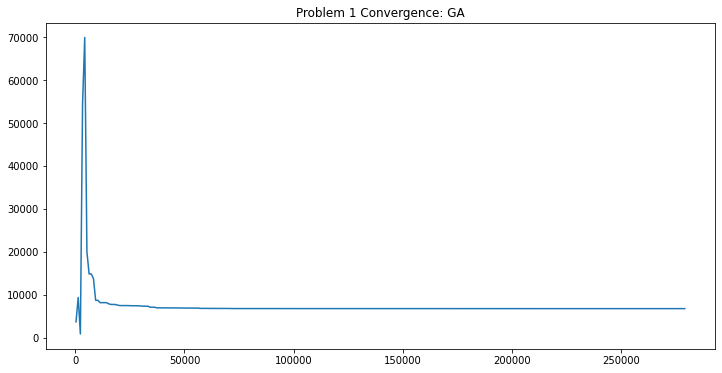

In [ ]:
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])
plt.figure(figsize=(12,6))
plt.title("Problem 1 Convergence: GA")
plt.plot(n_evals, opt, "-")
plt.show()

Convergence with logarithmic scale Y-Axis

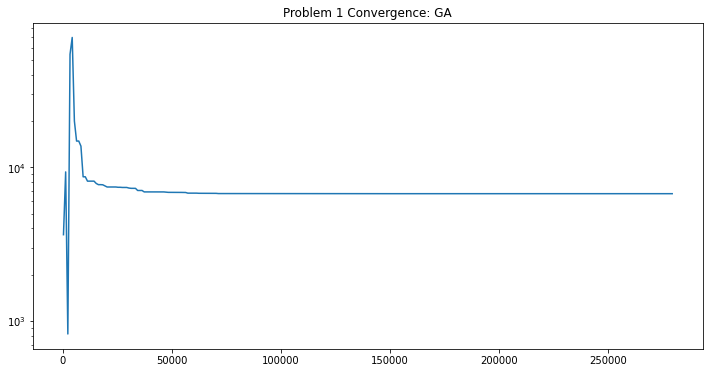

In [ ]:
n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])
plt.figure(figsize=(12,6))
plt.title("Problem 1 Convergence: GA")
plt.plot(n_evals, opt, "-")
plt.yscale("log")
plt.show()